In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
import os
import math
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from SpatialTemporal_Correlation_and_Convolution import STcorrelate
from SpatialTemporal_Correlation_and_Convolution import ST_STA
from SpatialTemporal_Correlation_and_Convolution import STconvolve

importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb


# Kernels

## T

In [3]:
# #Temporal kernal
# dimention: 1/T
def temporal(k1,k2,sigma1,sigma2,u1,u2,dt):
    t = np.arange(0,u2+5*sigma2,dt)
    kernal1 = (k1/np.sqrt(2*np.pi)/sigma1)*np.exp(-(t-u1)**2/(2*sigma1**2))
    kernal2 = (k2/np.sqrt(2*np.pi)/sigma2)*np.exp(-(t-u2)**2/(2*sigma2**2))
    return t, -kernal1+kernal2

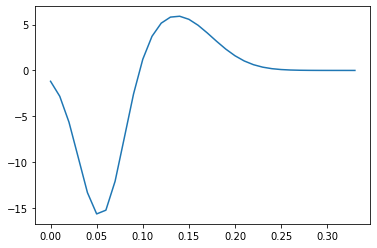

In [4]:
# t, k = temporal(1,1,0.02,0.05,0.06,0.15,0.01)
dt = 0.01
taxis, tk = temporal(1,0.6,0.024,0.04,0.055,0.135,dt)
plt.plot(taxis, tk)

## S

In [5]:
#Spatial kernal
# dimention: 1/L
def spatial(sigma_1,sigma_2, dx):
    x = np.arange(-5*sigma_2,5*sigma_2+dx,dx)
    kernal1 = (3.5/np.sqrt(2*np.pi)/sigma_1)*np.exp(-(x)**2/(2*sigma_1**2))
    kernal2 = (3/np.sqrt(2*np.pi)/sigma_2)*np.exp(-(x)**2/(2*sigma_2**2))
    return x, kernal1-kernal2
    #return kernal2-kernal1

Text(0, 0.5, 'Spatial weight')

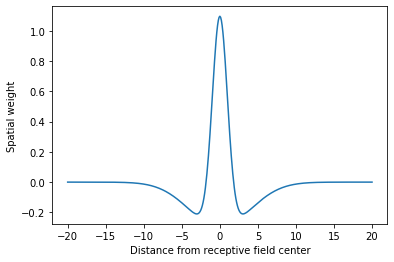

In [6]:
#Make Spatial kernal
sigma_B = 1#RF size of bipolar cell
sigma_A = 2*sigma_B #RF size of amacrine cell
dx = 0.1
xaxis, sk = spatial(sigma_B, 2*sigma_A, dx)
plt.plot(xaxis, sk)
plt.xlabel('Distance from receptive field center')
plt.ylabel('Spatial weight')

## T*S

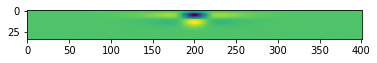

In [7]:
stk = tk[:,np.newaxis]*sk[np.newaxis,:]
plt.imshow(stk)

## decay

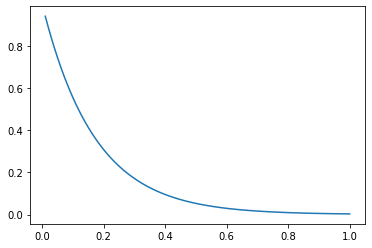

In [8]:
#Feedback filter for u
tau = 0.17#sec
decay = np.exp(-(np.arange(0,1,dt)+dt)/tau)
plt.plot(np.arange(0,1,dt)+dt,decay)
decay = decay[:,np.newaxis]

In [9]:
#Gain control function
def gain_func(v):
    v[v < 0] = 0
    return 1/(1+v**4)

# Stimulus

In [10]:
#Width setting
xstep = int(50*sigma_A/dx)+1#spatial extend of simulation
hw = 0.6*sigma_B #half bar width (D=L)

In [11]:
pos_0 = 10*sigma_A #Where the bar start (D=L)
tstep = 500 #time step of simulation
velocity = 3.3*hw #speed of bar (D=L/T)
order = 4 #Order of gain control
B = 70  #To tune altitude of gain control (D=1/T)

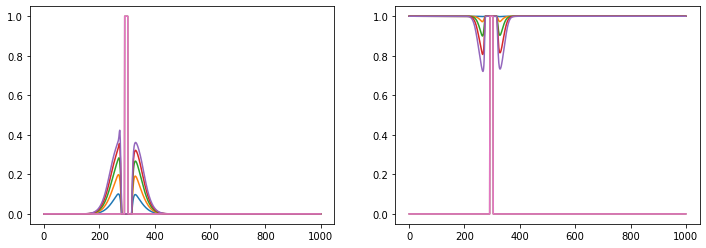

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2)
s = np.zeros([tstep,xstep])#stimulus
for i in range(tstep):
#     Bar position
    pos = pos_0+velocity*dt*i
    #Stimulus of bar
    s[i,int((pos- hw)/dx):int((pos+hw)/dx)] = 1
    
for contrast in np.arange(0.2,1.001,0.2):
    new_s = 1-s*contrast
    s_k = STconvolve(new_s,stk,dx,dt)
    
    output = np.zeros_like(s)
    gain = np.zeros_like(s)
    for i in np.arange(1,tstep):
        gain[i,:] = gain_func(np.sum(B*decay[:min(i,len(decay))]*output[i:max(0, i-len(decay)):-1,:]*dt ,axis=0))
        output[i,:] = gain[i,:]*s_k[i,:]
    output[output<0] = 0


    ax1.plot(output[-1,:]*5)
    ax2.plot(gain[-1,:])

for ax in (ax1, ax2):
    ax.plot(s[-1,:])
    ax.plot(s[-1,:])
#     ax.set_xlim([int((pos- 3*hw)/dx),int((pos+3*hw)/dx)])


fig.set_size_inches(12,4)